In [13]:
print 'pyhton 2: textbook on "numerical Python"'

pyhton 2: textbook on "numerical Python"


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
import sympy
from sympy import *


def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    return ax

x = sympy.symbols("x")
y = sympy.Function("y")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
# plot_direction_field(x, y(x), y(x)*x / (1+x**2), ax=axes[0]) # 1st exercise (US popualtion)
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
#plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])
#plot_direction_field(x, y(x), 2.0*x*(y(x)-1)/(1-x**2), ax=axes[2]) # 2nd exercise
plot_direction_field(x, y(x), (x+3*y(x))/(2*x+y(x)), ax=axes[2]) # 

In [4]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

Eq(Derivative(y(x), x), x + y(x)**2)

In [14]:
#set initial conditions
ics = {y(0): 0}
ode_sol = sympy.dsolve(y(x).diff(x) - f, ics=ics)
ode_sol

Eq(y(x), x**2/2 + x**5/20 + O(x**6))

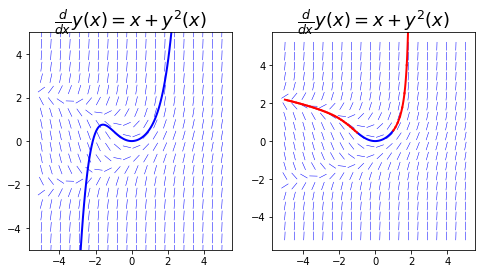

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# left panel
plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)

# right panel
plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
# iteratively resolve the ODE with updated initial conditions
ode_sol_m = ode_sol_p = ode_sol
dx = 0.125
# positive x
for x0 in np.arange(1, 2., dx):
    x_vec = np.linspace(x0, x0 + dx, 100)
    ics = {y(x0): ode_sol_p.rhs.removeO().subs(x, x0)}
    ode_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())(x_vec), 'r', lw=2)
# negative x
for x0 in np.arange(1, 5, dx):
    x_vec = np.linspace(-x0-dx, -x0, 100)
    ics = {y(-x0): ode_sol_m.rhs.removeO().subs(x, -x0)}
    ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())(x_vec), 'r', lw=2)